## Real Estate Price Predictor....

In [1]:
import pandas as pd

In [2]:
housing= pd.read_csv("data.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,ndx,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   ndx      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,crim,zn,indus,chas,ndx,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284148,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705457,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'ndx'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

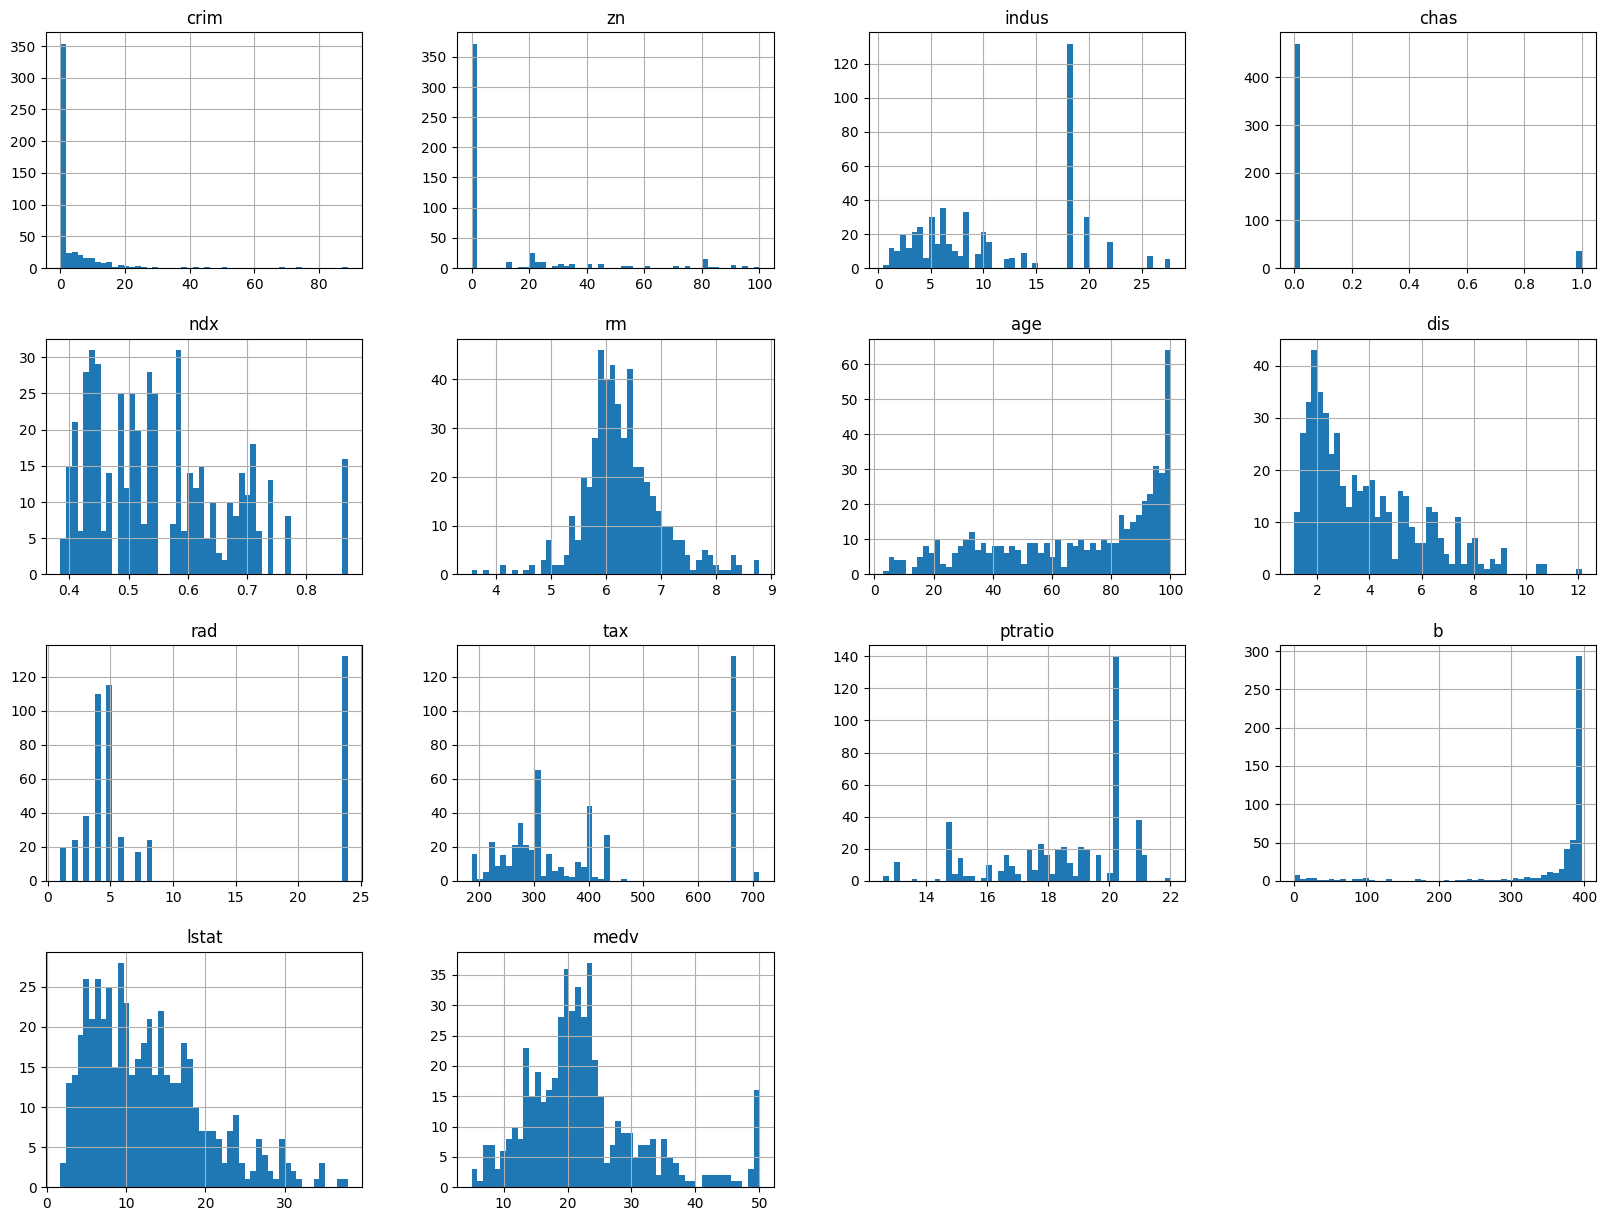

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50 , figsize=(20,15))

## Train-test spliting

In [8]:
#for learning perpose
# import numpy as np
# np.random.seed(42)
# def split_train_test(data,test_ratio):
#     shuffled=np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
# train_set,test_set=  split_train_test(housing, 0.2)

In [10]:
# print(f"rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}")

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2 ,random_state=42)
print(f"rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}")

rows in train set: 404
rows in test set: 102


In [12]:
#stratified shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits =1, test_size=0.2 ,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set =  housing.loc[test_index]

In [13]:
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [14]:
strat_train_set['chas'].value_counts()

chas
0    376
1     28
Name: count, dtype: int64

In [15]:
# 95/7

In [16]:
# 376/28

In [17]:
housing= strat_train_set.copy()

## looking for correlation

In [18]:
corr_matrix=housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.680331
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
ndx       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

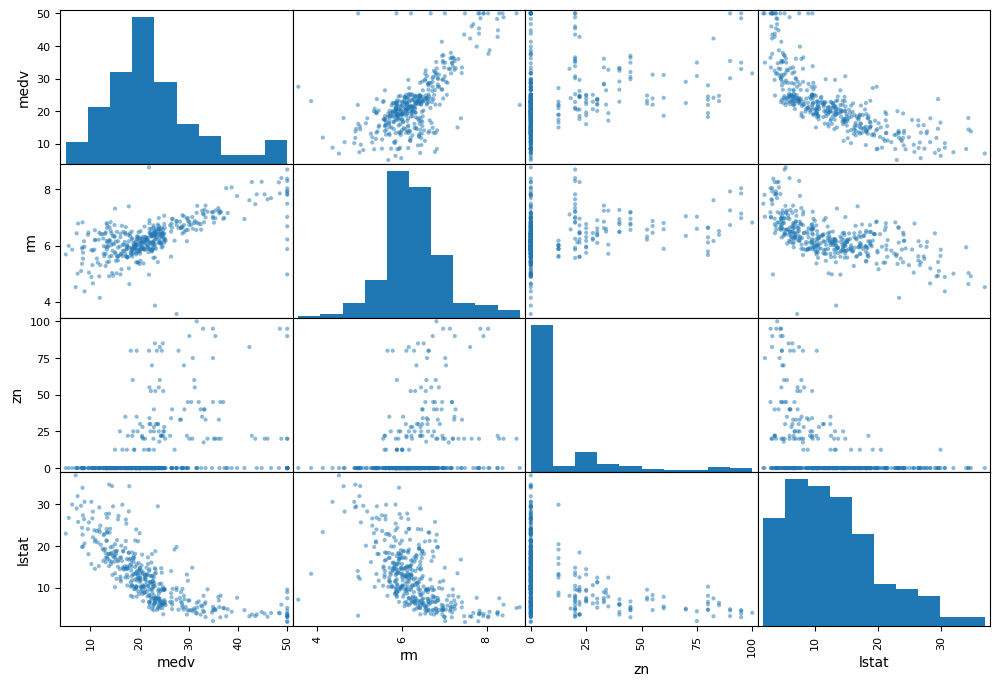

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["medv" , "rm" , "zn", "lstat"]
scatter_matrix(housing[attributes],figsize =(12,8))

<Axes: xlabel='rm', ylabel='medv'>

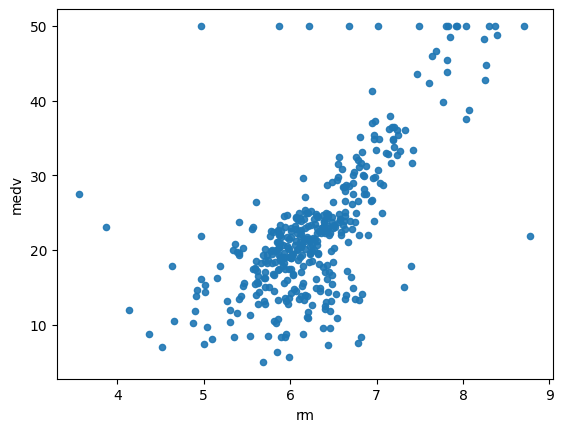

In [20]:
housing.plot(kind="scatter",x="rm",y="medv",alpha=0.9)

## trying attribute combination

In [21]:
housing["TAXRM"]= housing['tax']/housing['rm']

In [22]:
corr_matrix=housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.680331
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
ndx       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
TAXRM     -0.527628
lstat     -0.740494
Name: medv, dtype: float64

<Axes: xlabel='TAXRM', ylabel='medv'>

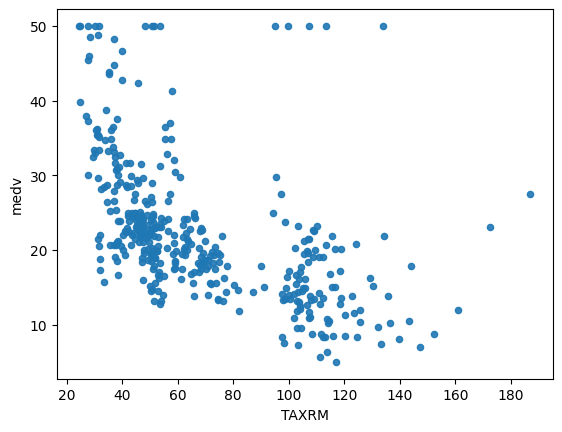

In [23]:
housing.plot(kind="scatter",x="TAXRM",y="medv",alpha=0.9)

In [24]:
housing=strat_train_set.drop("medv",axis=1)
housing_labels=strat_train_set["medv"].copy()

## Missing attributes

In [25]:
#three oftion for take care of missing attributes
#1.get rid of the missing datBPOINTS
#2.GET RID THE whole attribute
#3.set value 0,mean,median

In [26]:
a=housing.dropna(subset=["rm"])#1st option
a.shape
#there is no rm column and its acopy not original object

(400, 13)

In [27]:
housing.drop("rm",axis=1).shape#2st option
#there is no rm column and its acopy not original object

(404, 12)

In [28]:
meadian=housing["rm"].median()#option 3

In [29]:
housing["rm"].fillna(meadian)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [32]:
x=imputer.transform(housing)

In [33]:
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [34]:
housing_tr.describe()

,crim,zn,indus,chas,ndx,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279126,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712289,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

## primarily,three types of objects
1.estimator-it estimate some parameter based dataser rg.imputer it has fit and transform method
fit-fit the dataset and calculates internal parameters
2.transformers=transform method takes input and rturns output based on the learnings from fit().it alao has a conveince function call fit_transform() 
which fits and transform.
3.predictors=linear regression model is an example of predictor.fit() and predict() are two common function.it also gives score function which will
evalute the predictions

## feature scaling

primarily , two types of feature scaling methods:
1. min-max scaling(Normalization)
 (value-min)/(max-min)
 sklearn provides a class called minmaxscaler for this
2. Standardization
   (value-mean)/std
   sklearn provides a class called standardscaler for this

## creating a pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
   #......add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
    
])


In [36]:
housing_num_tr =my_pipeline.fit_transform(housing_tr)

In [37]:
housing_num_tr.shape

(404, 13)

## Selecting a desire model for dragon Real States

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [39]:
some_data=housing.iloc[:5]

In [40]:
some_labels=housing_labels.iloc[:5]

In [41]:
prepared_data=my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([22.315, 25.548, 16.349, 23.217, 23.495])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse= np.sqrt(mse)

In [45]:
mse

np.float64(1.4217313539603942)

## using better evaluation technique-cross validation


In [46]:
#1 2 3 4 5 6 7 8 9 10

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores= np.sqrt(-scores)

In [47]:
rmse_scores

array([2.8893938 , 2.78224439, 4.30216147, 2.61204573, 3.35212109,
       2.610155  , 4.62677463, 3.34193913, 3.09581424, 3.30477059])

In [48]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation: ",scores.std())

In [49]:
print_scores(rmse_scores)

Scores: [2.8893938  2.78224439 4.30216147 2.61204573 3.35212109 2.610155
 4.62677463 3.34193913 3.09581424 3.30477059]
Mean: 3.291742005929791
Standard deviation:  0.647765559438657


Quiz:Convert this notebook into a python file and run the pipeline using vs code

## saving the model

In [50]:
from joblib import dump,load
dump(model, 'Dragoan.joblib')


['Dragoan.joblib']

## testing the model on test

In [54]:
x_test =strat_train_set.drop("medv",axis=1)
y_test=strat_train_set["medv"].copy()
y_test_prepared = my_pipeline.transform(x_test)
final_predictions =model.predict(y_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(y_test))

[22.315 25.548 16.349 23.217 23.495 16.861 24.519 26.647 10.42  31.81
 16.308 18.707 10.443 34.16  22.394 13.857 18.581 17.76   6.781 20.662
 18.949 16.827 18.014 26.981 24.33  24.743 13.408 20.9   14.757 28.186
 14.333 18.222 11.539 13.647 20.864 27.117 23.53  47.019 32.701 20.09
 22.022 35.073 37.402  9.245 20.041 13.178 21.467 27.16  22.758  7.901
 24.808 23.013 23.887 30.296 14.963 38.175 21.545 25.097 33.439 17.479
 19.762 19.681 27.785 20.882 13.751 31.967 49.511 14.881 26.811 35.146
 22.664 36.427 23.171 10.235 20.793 26.719 25.873 15.296 16.598 18.639
 30.966  8.753 19.527 18.891 25.222 22.539 30.101 25.329 29.406 17.093
 23.08  29.987 27.712 20.212 21.276 34.939 29.76  19.447 23.105 17.399
 12.396 46.096 20.161 43.619 17.158 15.649 19.595 21.85  27.556 17.067
 16.698  7.545 14.79  20.687 11.409 18.974 14.062 35.994 24.456 15.639
 22.572  8.252  8.715 19.559 23.875 13.998 16.333 24.186 12.27  21.439
 23.111 12.485 18.093 12.574 47.568 18.227 23.995 23.359 21.997 49.275
 15.168 

In [53]:
final_rmse

np.float64(1.1923637674637695)

In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24054622, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the model

In [57]:
from joblib import dump, load
import numpy as np
model=load('Dragoan.joblib')
features=np.array([([-5.43942006,  99.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24054622, -1.31238772,  8.61111401, -0.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])])
model.predict(features)

array([22.425])